In [10]:
import numpy as np
import pandas as pd
from sklearn import manifold
import altair as alt
import scprep
import umap
import matplotlib.pyplot as plt
%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Filepaths

In [2]:
full_control_filepath = "../data/Tran_RGC_scRNA/unzipped/GSE137398_ONCRGCs_control_count_mat.csv"
full_disease_filepath = "../data/Tran_RGC_scRNA/unzipped/GSE137398_ONCRGCs_2w_afterCrush_count_mat.csv"
quality_control_trimmed_control_filepath = ""
quality_control_trimmed_disease_filepath = ""
test = "../data/Tran_RGC_scRNA/npys/toy-data/split-control_and_2w_after_crush_5000x5000_toy/test.npy"

## Loading and preprocess the data for the embbedings below

In [3]:
stacked = "../data/Tran_RGC_scRNA/npys/stacked/control_2w.npy"
stacked = np.load(stacked, allow_pickle=True)
data_without_meta = stacked[1:,:-1]
genes_names = stacked[0,:-1]
labels = stacked[1:,-1]
stacked_pandas = pd.DataFrame(data=stacked[1:,:-1], index=labels,columns=genes_names)
labels_encoding, labels_categorical = np.unique(labels, return_inverse=True)
labels_encoding, labels_categorical

(array(['2w_after_crush', 'control'], dtype=object),
 array([0, 0, 0, ..., 1, 1, 1]))

## Embedding with t-SNE

In [18]:
%time
tsne_op = manifold.TSNE(n_components=2, perplexity=50)
data_tsne = tsne_op.fit_transform(stacked_pandas[:])

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.9 µs


In [19]:
data_tsne = pd.DataFrame(data_tsne, index=labels[:])

In [20]:
data_tsne.describe(), data_tsne.shape

(                  0             1
 count  32076.000000  32076.000000
 mean      -0.106596     -0.551225
 std       30.057510     28.730577
 min      -71.470947    -69.743973
 25%      -23.130278    -23.566105
 50%        1.167595     -1.083739
 75%       23.586565     21.076893
 max       67.356750     73.432930,
 (32076, 2))

/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

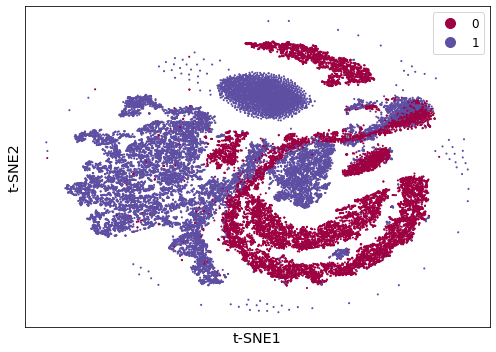

In [21]:
scprep.plot.scatter2d(data_tsne, c=labels_categorical[:], cmap='Spectral',  ticks=False, label_prefix='t-SNE', legend_anchor=(1,1), figsize=(7,5))

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
axes = axes.flatten()


genes_for_plotting = ['4933401J01Rik', 'Gm26206', 'Gm1992']

for gene, ax in zip(genes_for_plotting, axes):
    expression = scprep.select.select_cols(stacked_pandas[:], exact_word=gene)
    
    sort_index = expression.sort_values().index
    
    scprep.plot.scatter2d(stacked_pandas[:].loc[sort_index], c=np.array(expression.loc[sort_index],dtype=float), shuffle=False, 
                          title=gene, ticks=None, label_prefix='t-SNE', ax=ax)
    
fig.tight_layout()

## Projections with UMAP

In [26]:
%time
data_umap = umap.UMAP().fit_transform(stacked_pandas)
data_umap = pd.DataFrame(data_umap, index = stacked_pandas.index)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

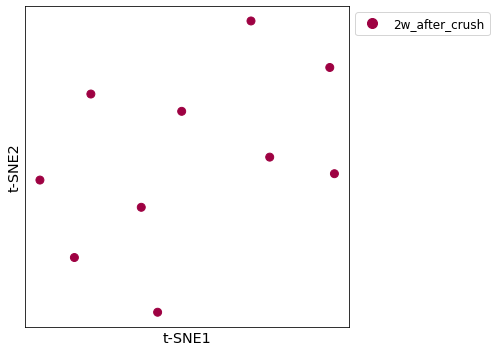

In [23]:
scprep.plot.scatter2d(data_umap, c=np.array(expression.loc[sort_index],dtype=int), cmap='Spectral',  ticks=False, label_prefix='t-SNE', legend_anchor=(1,1), figsize=(7,5))

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
axes = axes.flatten()


genes_for_plotting = ['4933401J01Rik', 'Gm26206', 'Gm1992']

for gene, ax in zip(genes_for_plotting, axes):
    expression = scprep.select.select_cols(stacked_pandas[:], exact_word=gene)
    
    sort_index = expression.sort_values().index
    
    scprep.plot.scatter2d(stacked_pandas[:].loc[sort_index], c=np.array(expression.loc[sort_index],dtype=float), shuffle=False, 
                          title=gene, ticks=None, label_prefix='t-SNE', ax=ax)
    
fig.tight_layout()        